# Introduction

**This notebook will approximately take 20 mins**. In this note book, we will simulate a 2 by 2 square mesh, a more complicated circuit than the one in Lesson 1. The circuit response and derivative will be verified by comparing with a commerical simulator, Lumerical Interconnect, and numerical differentiation, respectively. Finally, we will briefly touch on the circuit generator, and demonstrate how to use it to reduce the workload defining a circuit.


**Note**: Readers are highly encouraged to first read tutorial Lesson 1 before running this notebook. Please make sure you start a jupyter notebook in the folder 'lesson2_verify_2by2_mesh'. Otherwise, the image imported below might not display correcly.

## Part I: Verify Simulation Validity by Comparing with Lumerical Interconnect

Before running the following code, please see the folder 'lumerical_files'. We have provided 
'circuit2.icp' and 'circuit2.lsf'. 'circuit2.icp' is a circuit schematic containing 12 tunable basic units (TBUs) in total, and these TBUs are connected in the form of a 2 by 2 square mesh. 


<img src="lumerical_files/overall_circuit.png" width="500" align="center"/>

Similar to Lesson 1, if we right click any compound in the schematic, and choose 'expand', we will see the basic structure of a TBU.

<img src="lumerical_files/tbu.png" width="700" align="center"/>

Unlike in Lesson 1 where we only have one TBU, now we have a few. Setting their attributes by clicking will be tedious. Thus, we provide 'circuit2.lsf', and it could set values for TBU attributes in the circuit. The suffix 'lsf' is short for 'Lumerical Script File', and for details about how to write it, we recommend readers referring to Lumerical website. It is not our major concern here: **We have made sure that the circuit defined below is the same as the one defined by this lsf file.** 

The simulation results are run by us and provided in 'circuit2_real.txt' and
'circuit2_imag.txt'. If you want to re-simulate 'circuit2.icp' by yourself, please open an Lumerical Interconnect GUI, and open 'circuit2.icp' and 'circuit2.lsf'. Run 'circuit2.lsf' and wait it finishes. Then run the simulation 'circuit2.icp'. 


You are also welcomed to adjust the parameters' values and examine if ```Spode``` returns correct results in other cases. To do so, please make sure the circuit defined in Lumerical Interconnect and in our simulator is identical. **We highly recommend readers first reading Lesson 1 if you haven't.** We have commented on the parameter relationship in Lumerical Interconnect and our simulator there, which is very crucial to make sure the same circuit is defined in ```Spode``` and Lumerical Interconnect.


In [1]:
from spode.core import Circuit, FreeLightSpeed
import numpy as np
import matplotlib.pyplot as plt
import os

# For detailed meaning of each attribute, and how to define a TBU, please refer to the document.
# We have made sure that the model defined here is the same as in 'circuit2.icp' and 'circuit2.lsf'.

a1, a2, a3, a4 = 0.5*np.pi, 0.0*np.pi, (0.25+0.02)*np.pi, (0.25-0.01)*np.pi

circuit_element = {
    'tbum1': {'ln': ['n1', 'n6'], 'rn': ['n2', 'n7'],     'theta':  a1, 'phi': a2, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},
    'tbum4': {'ln': ['n14', 'n20'], 'rn': ['n15', 'n21'], 'theta':  a1, 'phi': a2, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},    
    'tbum5': {'ln': ['n24', 'n29'], 'rn': ['n25', 'n30'], 'theta':  a1, 'phi': a2, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},
    'tbum6': {'ln': ['n26', 'n31'], 'rn': ['n27', 'n32'], 'theta':  a1, 'phi': a2, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},
    'tbum7': {'ln': ['n6', 'n5'], 'rn': ['n12', 'n11'],   'theta':  a1, 'phi': a2, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},
    'tbum9': {'ln': ['n10', 'n9'], 'rn': ['n16', 'n15'],  'theta':  a1, 'phi': a2, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},
    'tbum11': {'ln': ['n20', 'n19'], 'rn': ['n26', 'n25'], 'theta':  a1, 'phi': a2, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},
    'tbum12': {'ln': ['n22', 'n21'], 'rn': ['n28', 'n27'], 'theta': a1, 'phi': a2, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},
    
    # these following TBUs' phase shifts have been deliberately modified to increase difficuty
    
    'tbum2': {'ln': ['n3', 'n8'], 'rn': ['n4', 'n9'],     'theta':  0.48*np.pi, 'phi': 0.02*np.pi, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},
    'tbum3': {'ln': ['n12', 'n18'], 'rn': ['n13', 'n19'], 'theta':  0.47*np.pi, 'phi': 0.03*np.pi, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},
    'tbum8': {'ln': ['n8', 'n7'], 'rn': ['n14', 'n13'],    'theta': 0.49*np.pi, 'phi': 0.01*np.pi, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},
    'tbum10': {'ln': ['n18', 'n17'], 'rn': ['n24', 'n23'], 'theta': 0.46*np.pi, 'phi': 0.04*np.pi, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95},
}


mode_info = {'neff': 2.35, 'ng': 4.0, 'wl': FreeLightSpeed / 193.1e12} # neff and ng are provided at 193.1Thz
omega = np.linspace(192.5, 193.5, 1000) * 1e12 * 2 * np.pi
prob_node = ['n23']
deri_node = []
srce_node = {'n4': 1.0}
deri_vari = []

circuit = Circuit(circuit_element=circuit_element,
                  mode_info=mode_info,
                  omega=omega,
                  srce_node=srce_node,
                  prob_node=prob_node,
                  deri_node=deri_node,
                  deri_vari=deri_vari)

response = circuit.solve(require_grads=False)

# response shape: (len(self.prob_node), len(omega), 2).


# 'response' has last dimension equal to 2. Because at one port, there are two optical signals
# for inward and outward directions, respectively. For a floating node (a node with only one circuit element
# connected), the outward optical signal stores at index=1, while the inward optical signal stores at index=0.

outward_ind = 1

The circuit schematic is shown below:

<img src="figs/schematic.png" width="400" align="center"/>

In [2]:
# a helper function for reading the simulation result of Lumerical Interconnect
def parse_lumerical_result(file_path):
    wl, result = [], []
    with open(file_path, 'r') as f:
        for line_num, line in enumerate(f.readlines()):
            if line_num >= 3:  # the saved lumerical txt file contains data starting from the third line
                cur_line = line.strip().split(',')
                if len(cur_line) == 2 and cur_line[0] and cur_line[1]:
                    wl.append(eval(cur_line[0]))
                    result.append(eval(cur_line[1]))
    return wl, result


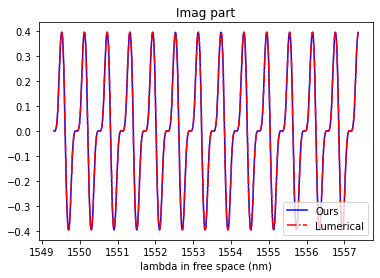

In [3]:
plt.figure()
plt.plot(2 * np.pi * FreeLightSpeed / circuit.omega * 1e9, np.imag(response[0, :, outward_ind]), 'blue', linestyle='-',
         label='Ours')

file_path = './lumerical_files/circuit2_imag.txt'
if os.path.exists(file_path):
    wl, result = parse_lumerical_result(file_path)
    plt.plot(wl, result, 'r', linestyle='-.', label='Lumerical')

plt.xlabel('lambda in free space (nm)')
plt.legend()
plt.title('Imag part')
plt.show()

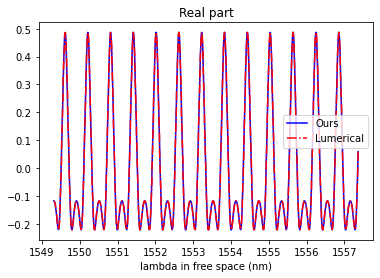

In [4]:
plt.figure()
plt.plot(2 * np.pi * FreeLightSpeed / circuit.omega * 1e9, np.real(response[0, :, outward_ind]), 'blue', linestyle='-',
         label='Ours')

file_path = './lumerical_files/circuit2_real.txt'
if os.path.exists(file_path):
    wl, result = parse_lumerical_result(file_path)
    plt.plot(wl, result, 'r', linestyle='-.', label='Lumerical')

plt.xlabel('lambda in free space (nm)')
plt.legend()
plt.title('Real part')
plt.show()

Ok, it is obvious that our simulator gives exactly the same as Lumerical Interconnect! 

## Part II: Verify Our Gradient Calculation

As we have already verified the calculation of port magnitude. Now, we turn to verify our gradient calculation. We compare our obtained analytical gradient with the gradient obtained by numerical differentiation.

In [5]:
# Let's verify the calculation of gradient w.r.t. theta, phi, l, and alpha of all TBUs in the circuit.

circuit.update_attr('deri_node', ['n23', ])  # specify the magnitude of port 23 is of interest

deri_list = ['theta', 'phi', 'l', 'alpha']
incremental_list = [1e-8, 1e-8, 1e-14, 1e-8] # l needs a smaller step

for cur_tbu_name in circuit_element.keys():
    for i, deri in enumerate(deri_list):

        incremental = incremental_list[i]

        # analytical differentation by our simulator

        cur_deri_vari = cur_tbu_name + "::" + deri
        circuit.update_attr('deri_vari', [cur_deri_vari, ])
        _, grads = circuit.solve(require_grads=True)  # grad shape: (len(deri_node), len(deri_vari), len(omega), 2)
        analytical_grad = grads[:, 0, :, :]

        # numerical differentiation

        nominal_value = circuit.get_attr('circuit_element', cur_deri_vari)
        circuit.update_attr('circuit_element', nominal_value + incremental, cur_deri_vari)
        response_deviated = circuit.solve(require_grads=False)
        numerical_grad = (response_deviated - response) / incremental

        
        # calculate the difference between our analytical gradient and the gradient using numerical differentiation
        diff = np.max(np.abs(analytical_grad - numerical_grad))
        print("Max(abs(analytical_grad - numerical_grad))=%.3e \nMean(numerical_grad)=%.3e\n" \
              % (diff, np.mean(np.abs(numerical_grad))))

        # remember to set the attribute value to its nominal, so that we could verify other gradients in the next iteration
        circuit.update_attr('circuit_element', nominal_value, cur_deri_vari)
        circuit.update_attr('deri_vari', [])


Max(abs(analytical_grad - numerical_grad))=4.227e-08 
Mean(numerical_grad)=1.808e-02

Max(abs(analytical_grad - numerical_grad))=4.994e-08 
Mean(numerical_grad)=1.697e-02

Max(abs(analytical_grad - numerical_grad))=4.228e+00 
Mean(numerical_grad)=2.356e+05

Max(abs(analytical_grad - numerical_grad))=3.126e-08 
Mean(numerical_grad)=2.610e-02

Max(abs(analytical_grad - numerical_grad))=3.406e-08 
Mean(numerical_grad)=2.229e-02

Max(abs(analytical_grad - numerical_grad))=4.721e-08 
Mean(numerical_grad)=2.728e-02

Max(abs(analytical_grad - numerical_grad))=8.364e+00 
Mean(numerical_grad)=4.497e+05

Max(abs(analytical_grad - numerical_grad))=3.897e-08 
Mean(numerical_grad)=4.982e-02

Max(abs(analytical_grad - numerical_grad))=2.773e-08 
Mean(numerical_grad)=1.615e-02

Max(abs(analytical_grad - numerical_grad))=3.018e-08 
Mean(numerical_grad)=1.721e-02

Max(abs(analytical_grad - numerical_grad))=5.814e+00 
Mean(numerical_grad)=2.243e+05

Max(abs(analytical_grad - numerical_grad))=2.972e-08 


## Part III Automatic Circuit Schematic Generation

As we see above, this is only a 2 by 2 squaure mesh. Manually writing the componenet connection (i.e., defining the left node ```ln``` and right node ```rn``` in ```circuit_element```) is already tedious. To address this issue, ```Spode``` has provided a built-in function which could generate various circuit topologies. Namely, this function could automatically define a ```circuit_element``` for you. In the following, we provide an example on how to use it.

In [6]:
from spode.util import generate

# placement = 'square_1': generate a square mesh
# size = [2,2]: 2 rows and 2 columns
# tbu_model = 'tbum': which TBU model to use
# init_dict: initialize all TBUs accoring to this dict
circuit_element_by_generator = generate(placement = 'square_1', size = [2, 2], tbu_model = 'tbum', init_dict = {'theta': a1, 'phi': a2, 'l': 250e-6,
              'cp_left': a3, 'cp_right': a4, 'alpha': 0.95})

 **We highly suggest reading this cell before approaching to the next.** Readers are recommended to use:

```
import pprint
pprint.pprint(circuit_element_by_generator)
```

to see how we name each TBU and each node. 

Our naming convention is easy and generic. For naming a TBU, we use the format: ```tbum_a#b_c#d_{v,h}``` to represent a TBU between ```Cell (a,b)``` and ```Cell (c,d)```. The suffix ```v``` and ```h``` mean vertical and horizontal, respectively. If you use other TBU models like ```tbuo``` or ```tbut```, then the prefix ```tbum``` should be changed accordingly. For naming a port, we notice that each port is always associated with a cell, thus we use the format: ```n_a#b_{tl,tr,bl,br}``` to represent a port belonging to the top/bottom-left/right of ```Cell (a,b)```. The following figure demonstrates our naming convention:

<img src="figs/naming.png" width="700" align="center"/>

Readers might ask how to define the node at the bottom line? Take this 2 by 2 square mesh as an example, we imagine ```Cell (3,1)``` and ```Cell (3,2)``` also exist, so that our naming convention could be applied to define those nodes at the bottom line. Similarly, we imagine ```Cell (0,1)``` and ```Cell (0,2)``` exist, to deinfe the nodes at the top line. To better understand our naming convention, the following figure provides several examples in a 2 by 2 square mesh.

<img src="figs/example.png" width="400" align="center"/>

In the next notebook, we will look carefully into all details of the naming rules, which is of crucial importance to correcly utilize the built-in visualization function.

In [7]:
# Constrcut the Circuit object. We will compare this with the previous circuit instance in Part I.

# Note that in the circuit instance defined previously in Part I, there are several TBUs have attributes
# deliberately modified. We need to do the same modification to circuit_element_by_generator.

# revise the phase shifts corresponding to 'tbum2' in Part I
circuit_element_by_generator['tbum_0#2_1#2_h']['theta'] = 0.48 * np.pi
circuit_element_by_generator['tbum_0#2_1#2_h']['phi']   = 0.02 * np.pi

# revise the phase shifts corresponding to 'tbum4' in Part I
circuit_element_by_generator['tbum_1#1_2#1_h']['theta'] = 0.47 * np.pi
circuit_element_by_generator['tbum_1#1_2#1_h']['phi']   = 0.03 * np.pi

# revise the phase shifts corresponding to 'tbum8' in Part I
circuit_element_by_generator['tbum_1#2_1#1_v']['theta'] = 0.49 * np.pi
circuit_element_by_generator['tbum_1#2_1#1_v']['phi']   = 0.01 * np.pi


# revise the phase shifts corresponding to 'tbum10' in Part I
circuit_element_by_generator['tbum_2#1_2#0_v']['theta'] = 0.46 * np.pi
circuit_element_by_generator['tbum_2#1_2#0_v']['phi']   = 0.04 * np.pi


In [8]:
# Ok, we are ready to build the circuit instance and run the simulation.

circuit_by_generator = Circuit(circuit_element=circuit_element_by_generator,
                  mode_info=mode_info,
                  omega=omega,
                  srce_node={'n_0#2_br': 1.0}, # corresponding to {'n4':1.0} in Part I
                  prob_node=['n_2#0_br'], # corresponding to ['n23'] in Part I
                  deri_node=[],
                  deri_vari=[])

response_by_generator = circuit_by_generator.solve(require_grads=False)

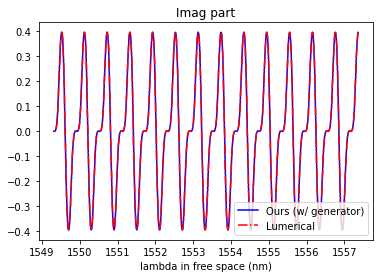

In [9]:
plt.figure()
plt.plot(2 * np.pi * FreeLightSpeed / circuit.omega * 1e9, np.imag(response_by_generator[0, :, outward_ind]), 'blue', linestyle='-',
         label='Ours (w/ generator)')

file_path = './lumerical_files/circuit2_imag.txt'
if os.path.exists(file_path):
    wl, result = parse_lumerical_result(file_path)
    plt.plot(wl, result, 'r', linestyle='-.', label='Lumerical')

plt.xlabel('lambda in free space (nm)')
plt.legend()
plt.title('Imag part')
plt.show()

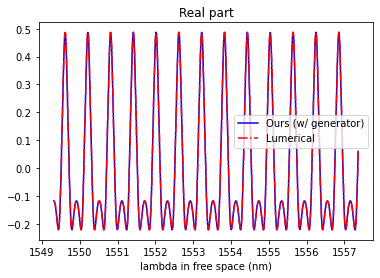

In [10]:
plt.figure()
plt.plot(2 * np.pi * FreeLightSpeed / circuit.omega * 1e9, np.real(response_by_generator[0, :, outward_ind]), 'blue', linestyle='-',
         label='Ours (w/ generator)')

file_path = './lumerical_files/circuit2_real.txt'
if os.path.exists(file_path):
    wl, result = parse_lumerical_result(file_path)
    plt.plot(wl, result, 'r', linestyle='-.', label='Lumerical')

plt.xlabel('lambda in free space (nm)')
plt.legend()
plt.title('Real part')
plt.show()

Thus far, we have shown how to generate a N by M square mesh automatically. Besides square mesh, ```Spode``` has built-in generators for several other topologies. Upon request, we could implement the automatic generation of your topology into ```Spode```. In the later notebook, we will have a closer look at the circuit generator and demonstrate how to use it to automatically synthesize target light processing functions on a programmable photonics circuit.

In [11]:
# Users could call the following function to see the supported circuit generator.
from spode.util import get_supported_placement
get_supported_placement()


Automatic schematic generation is supported for the following placements:
### config = 'square_1', len(size) = 2. A basic square mesh of size N by M. Two integers are needed to define this placement, representing #Row and #Col.
### config = 'hexagonal_1', len(size) = 1. A concentric hexagonal mesh with N levels. One integer is needed to define this placement, representing #level.
### config = 'triangular_1', len(size) = 2. A triangular mesh structure of size N by M (close to diamond). Two integers are needed to define this placement, representing #Row and #Col.


